# Project 1 by Thidathorn Vanitsthian 
#Note: Report must be in ipython notebook, save everything in text, use Markdown instead of Code
#Requirements
#You need to perform an exhaustive exploration of your dataset.
#Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
#You need to define functions (no matter how complicated they are)
#You don't need to do any modeling
#Load and clean, if neccessary, the data with pandas.
#Describe the data and investigate any outliers.
#Explore relationships between the variables.
#Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
#Visualize subsets of the variables you chose, subsetted conditional on some other variable.
#Write a brief report on at least 5 things you found interesting about the data or, 
#if it doesn't interest you at all, things you found out and why they are boring.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load and clean data

In [2]:
df = pd.read_csv("/Users/Bua/Downloads/drones.csv")

In [3]:
df.shape


(381, 27)

In [10]:
df.columns

Index([u'Strike ID', u'Bureau ID', u'Date', u'Time', u'Location', u'Area',
       u'Target', u'Target Group', u'Westerners involved',
       u'Minimum Total Killed', u'Mean Total Killed', u'Maximum Total Killed',
       u'Number of deaths', u'AQ/TB Killed', u'Minimum civilians killed',
       u'Maximum civilians killed', u'Civilians Killed', u'Min injured',
       u'Max injured', u'Injured', u'Minimum children killed',
       u'Max children killed', u'Children Killed', u'Pakistani approval',
       u'Short Summary', u'Related ID', u'Notes'],
      dtype='object')

In [39]:
df.dtypes

Strike ID                            int64
Bureau ID                           object
Date                        datetime64[ns]
Location                            object
Area                                object
Target                              object
Target Group                        object
Westerners involved                 object
Minimum Total Killed                 int64
Mean Total Killed                  float64
Maximum Total Killed                 int64
AQ/TB Killed                        object
Minimum civilians killed           float64
Maximum civilians killed           float64
Min injured                        float64
Max injured                        float64
Minimum children killed            float64
Max children killed                float64
dtype: object

In [47]:
# Time always the same of None
# "Number of deaths", "Civilians Killed", "Children Killed" redundant infornation
# "Pakistani approval" small quantity of data (19 records)
df.drop(['Time', 'Number of deaths', 'Civilians Killed', 'Injured', 'Children Killed', 'Pakistani approval'], axis=1, inplace=True, errors='ignore')
# Convert 'Date' field to DateTime object
df['Date'] =  pd.to_datetime(df['Date'])

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Strike ID,381.0,201.551181,115.718309,3.0,103.0,201.0,298.0,412.0
Minimum Total Killed,381.0,6.330709,6.933582,0.0,3.0,4.0,7.0,81.0
Mean Total Killed,283.0,9.088339,8.613199,0.0,NaN,NaN,NaN,82.0
Maximum Total Killed,381.0,9.713911,8.656883,0.0,5.0,7.0,12.0,83.0
Minimum civilians killed,173.0,2.404624,6.721052,0.0,NaN,NaN,NaN,80.0
Maximum civilians killed,173.0,5.497110,8.717547,0.0,NaN,NaN,NaN,82.0
Min injured,305.0,3.678689,3.725142,0.0,NaN,NaN,NaN,27.0
Max injured,305.0,5.265574,5.487273,0.0,NaN,NaN,NaN,50.0
Minimum children killed,69.0,2.434783,8.232786,0.0,NaN,NaN,NaN,68.0
Max children killed,68.0,2.941176,8.534185,0.0,NaN,NaN,NaN,70.0


# Data analysis

# Top places of drone attack

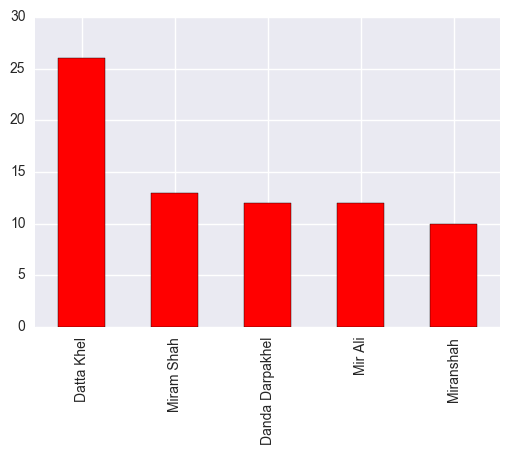

In [48]:
df['Location'].value_counts()[:5].plot(kind='bar', color='red')

# Quantity of strikes in each year

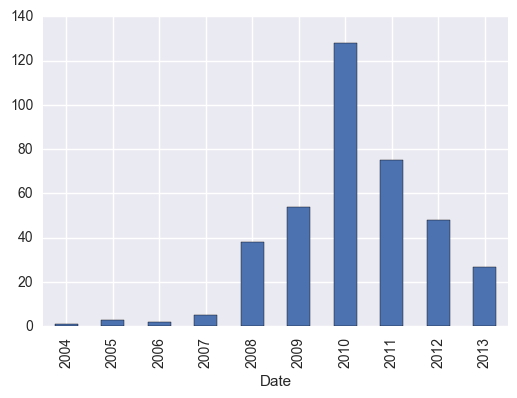

In [49]:
df.groupby(df['Date'].map(lambda x: x.year))['Strike ID'].count().plot(kind='bar')

# Quantity of strikes for each month

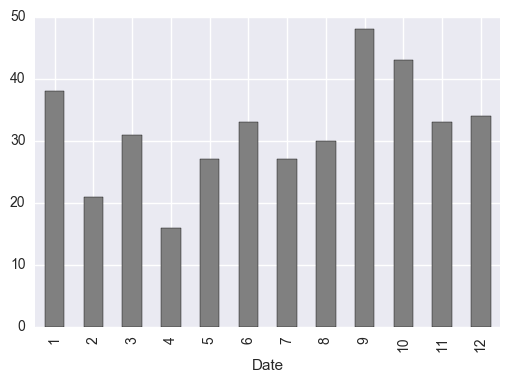

In [53]:
df.groupby(df['Date'].map(lambda x: x.month))['Strike ID'].count().plot(kind='bar', color='grey')

# Overview of the Mean Total Killed by each Target Group

In [11]:
df.groupby(['Target'], sort=True)[['Mean Total Killed']].mean().sort_values(by=['Mean Total Killed'], ascending=False).reset_index()

,Target,Mean Total Killed
0,Maulvi Liaqat,82.000000
1,Bahram Khan Kochi,31.000000
2,Ayman al-Zawahiri; Abu Khabab al-Masri; Abd Ra...,20.000000
3,Abdul Rehman,19.000000
4,Jalalludin Haqqani,15.500000
5,Qari Imran,14.000000
6,Hakimullah Mehsud,14.000000
7,Abu Jihad al-Masri; Abdur Rehman abu Akash,14.000000
8,Abu Laith al-Libi,14.000000
9,Baitullah Mehsud ally,13.000000


# Most common target of drone attack

In [55]:
def count_targets(data):
    d = {}
    for x in df['Target'][df['Target'].notnull()]:
        for target in x.split(';'):
            if target.strip() in d.keys():
                d[target.strip()] += 1
            else:
                d[target.strip()] = 1
    return sorted(d.items(), key=lambda x: x[1], reverse=True)

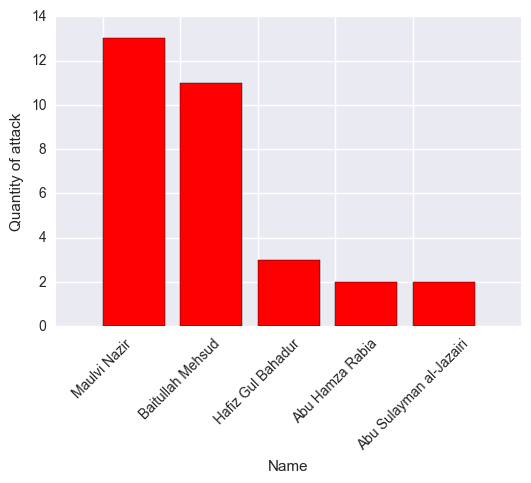

In [57]:
fig, ax = plt.subplots()
N = 5
ind = 0.6
targets = count_targets(df)
width = np.arange(N)
height = [x[1] for x in targets][:N]
labels = [x[0] for x in targets][:N]
ax.bar(width + ind, height, color='red')
ax.set_xticks(width + ind)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Name')
ax.set_ylabel('Quantity of attack')

# Quantity of people killed

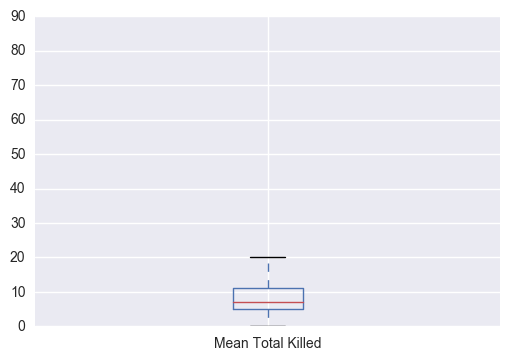

In [59]:
df['Mean Total Killed'][df['Mean Total Killed'].notnull()].plot(kind='box')

# Area of attack

In [62]:
def area_of_attack(df):
    d = {}
    for x in df['Area']:
        if x.strip() in d.keys():
            d[x.strip()] += 1
        else:
            d[x.strip()] = 1
    d['other'] = 0
    for key in list(d.keys()):
        if d[key] < 10:
            d['other'] += d[key]
            del d[key]
    return d

([<matplotlib.patches.Wedge at 0x1190abd90>,
  <matplotlib.text.Text at 0x1190c57d0>])

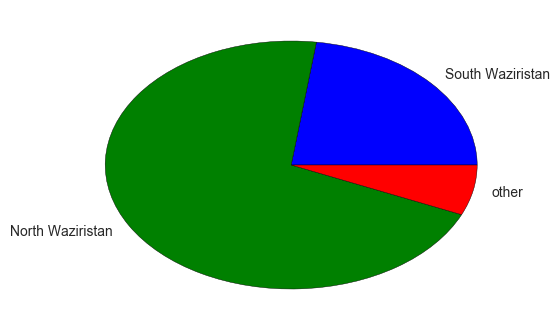

In [63]:
areas = area_of_attack(df)
values = areas.values()
keys = areas.keys()

plt.pie([float(v) for v in values], labels=[str(k) for k in keys], autopct=None)


# Child death related to day of the week

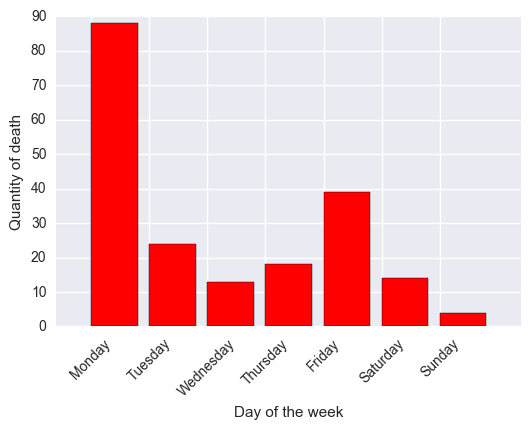

In [65]:
def child_death_by_week(df):
    d = {}
    for index, row in df[df['Max children killed'].notnull()].iterrows():
        day = row['Date'].weekday()
        if day in d.keys():
            d[day] += int(row['Max children killed'])
        else:
            d[day] = int(row['Max children killed'])
    return d

quantity = child_death_by_week(df)
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots()
ind = 0.6
targets = count_targets(df)
width = np.arange(7)
height = [x for x in quantity.values()]
ax.bar(width + ind, height, color='red')
ax.set_xticks(width + ind)
ax.set_xticklabels(day_labels, rotation=45)
ax.set_xlabel('Day of the week')
ax.set_ylabel('Quantity of death')

##Insights gained from this report
- the largest number of children died on Monday, it might depend on the fact that on Monday the largest number of children go to school, and the number of attacks on Saturday and Sunday was minimal

- the largest number of children died 10/30/06, it could happen if the attack was carried out on a place with a high accumulation of children, such as school.

- Top 3 most common targets of drone attacks were leaders militants of the Pakistani Taliban.

- The quantity of attacks greatly increased after Obama became president.

- The main organization which perpetrated the attacks were 'Al-Qaeda', 'Taliban' and 'Haqqani'